#Wine quality prediction

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

plt.style.use("ggplot")

In [2]:
data = pd.read_csv("/content/winequality-red.csv");

print(f"Shape: {data.shape}")
data.head()

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data = data.rename(columns=lambda column: column.title().replace(" ", ""))
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,Ph,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
features = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'Ph',
       'Sulphates', 'Alcohol']
target = "Quality"

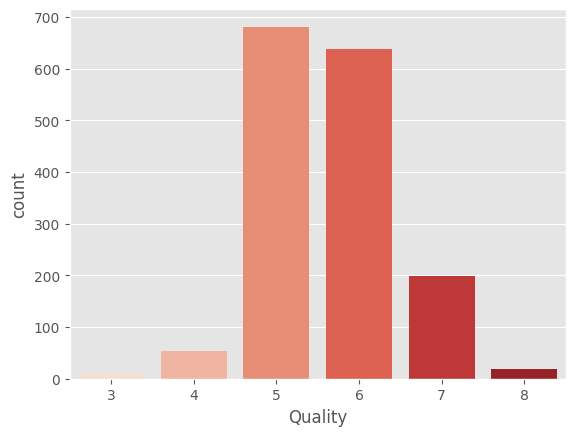

In [10]:
ax = sns.countplot(x=target, data=data, palette="Reds")

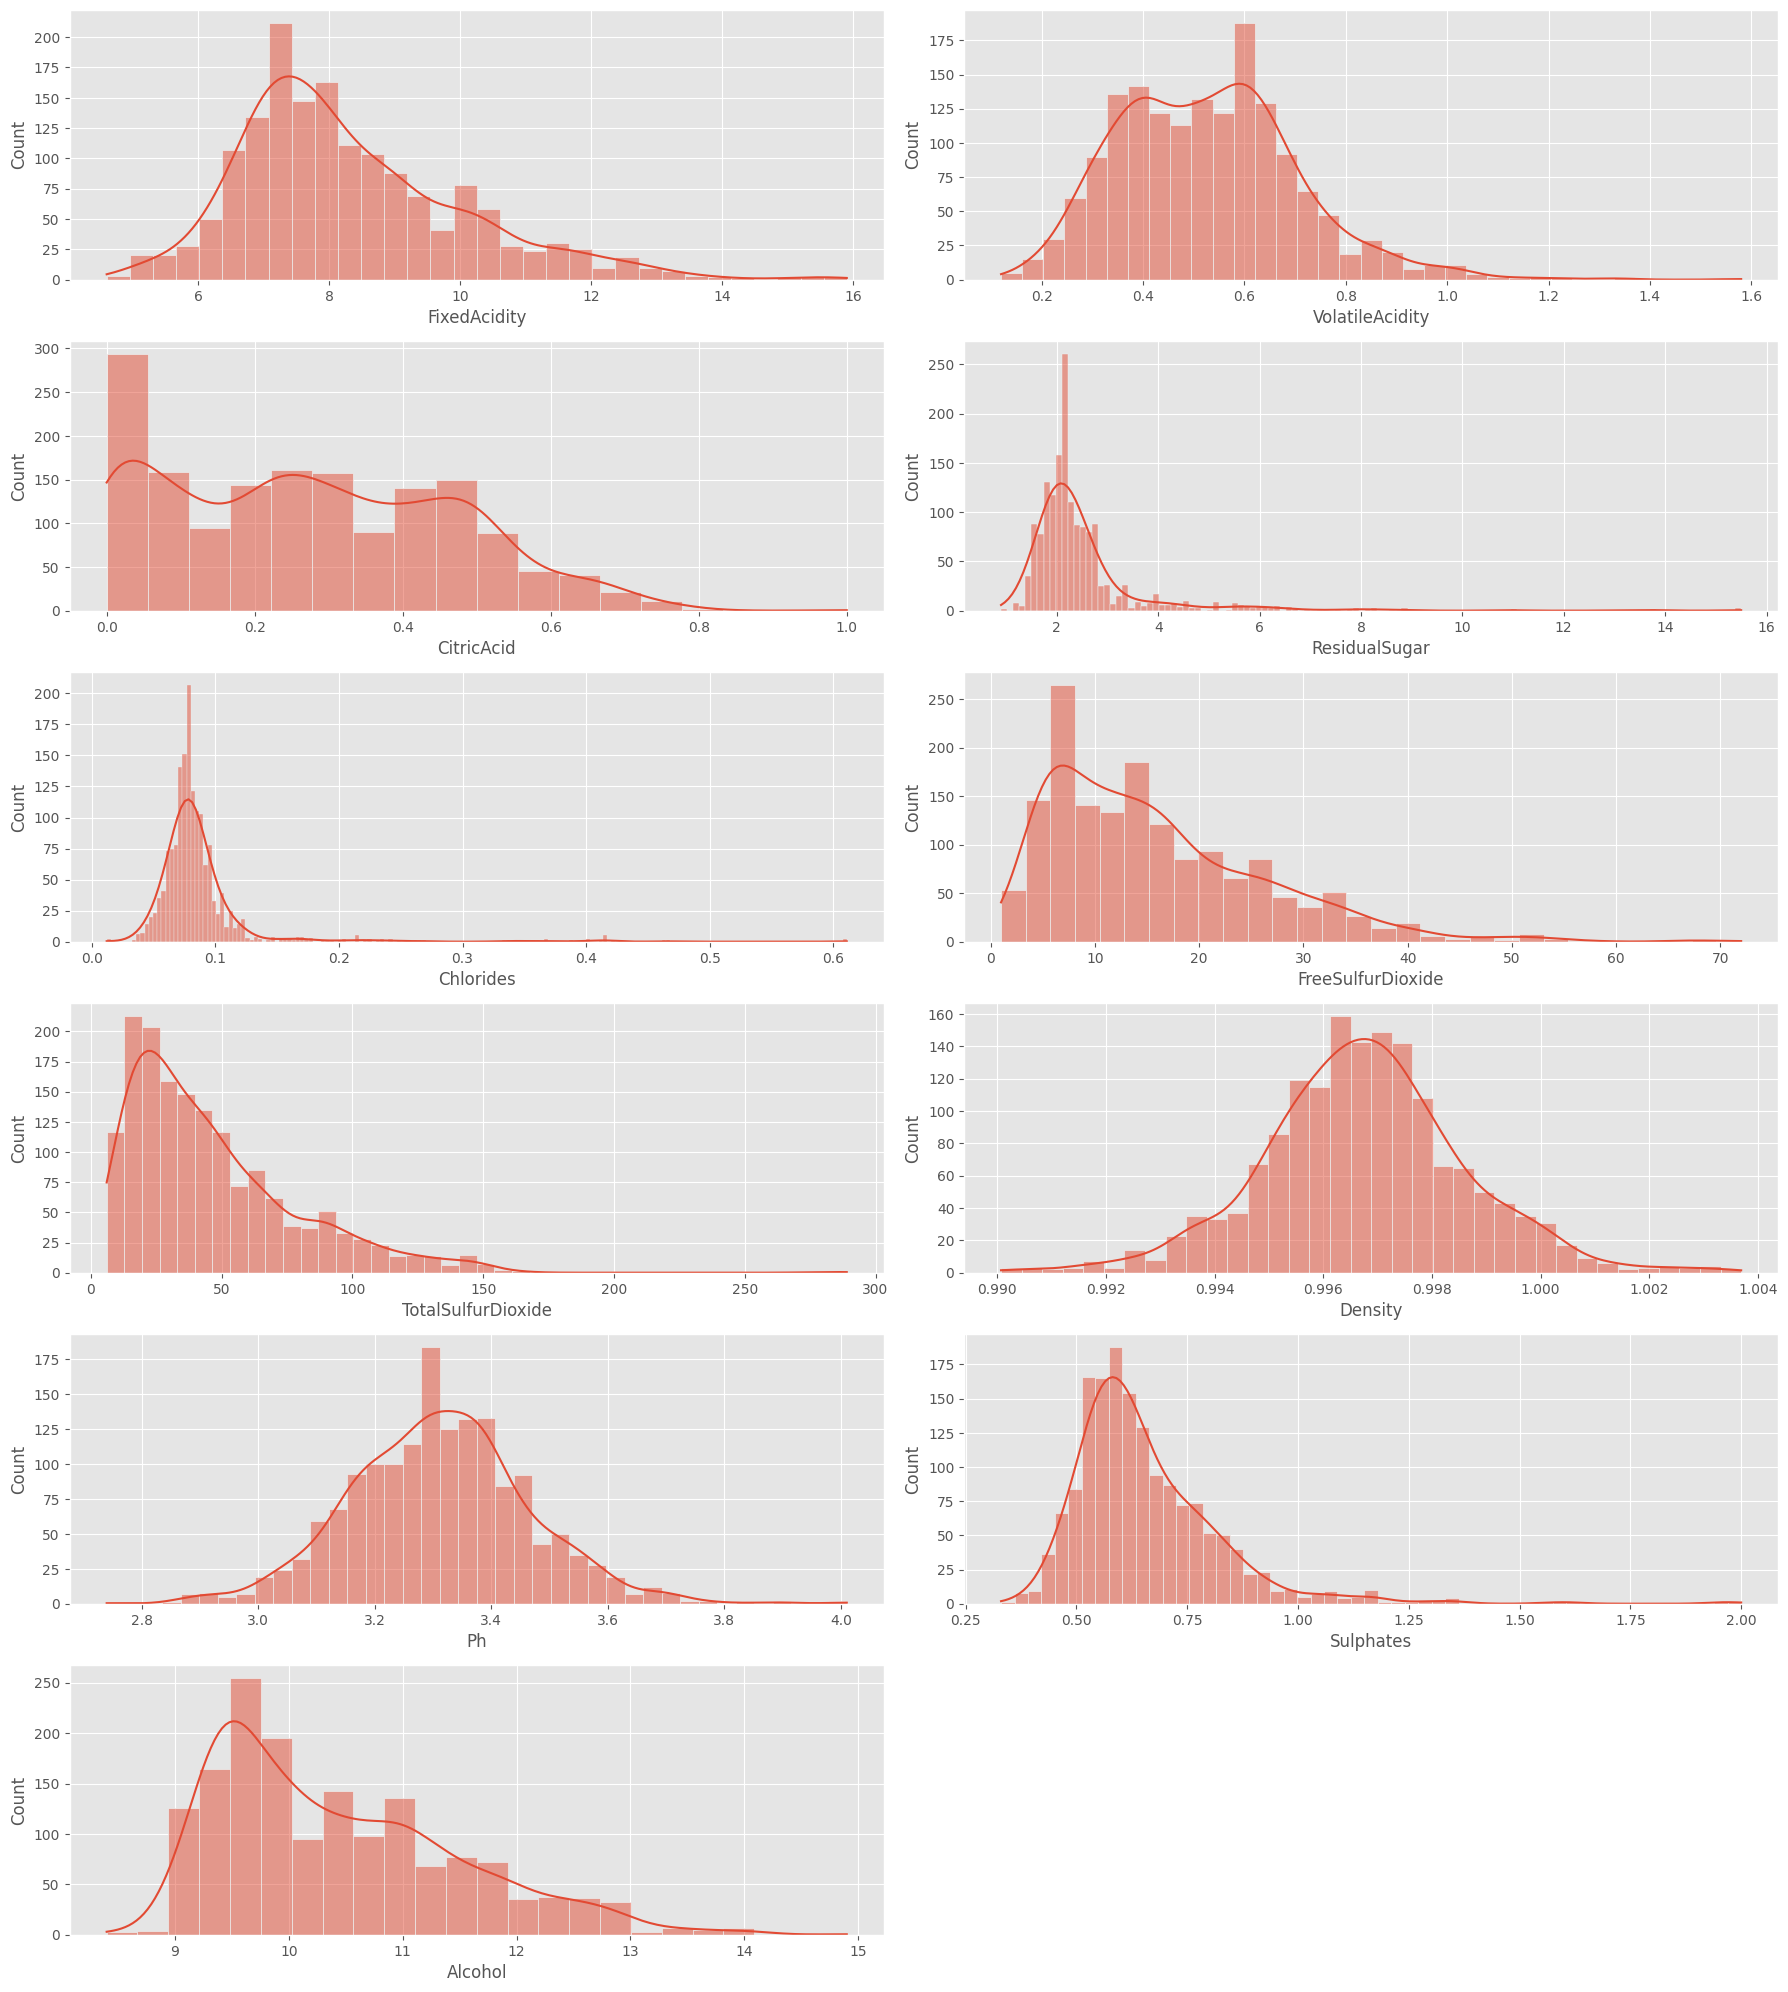

In [11]:
fig = plt.figure(figsize=(18, 20))
for index, column in enumerate(features):
    plt.subplot(6, 2, index+1)
    sns.histplot(data[column], kde=True)
fig.tight_layout(pad=1.0)

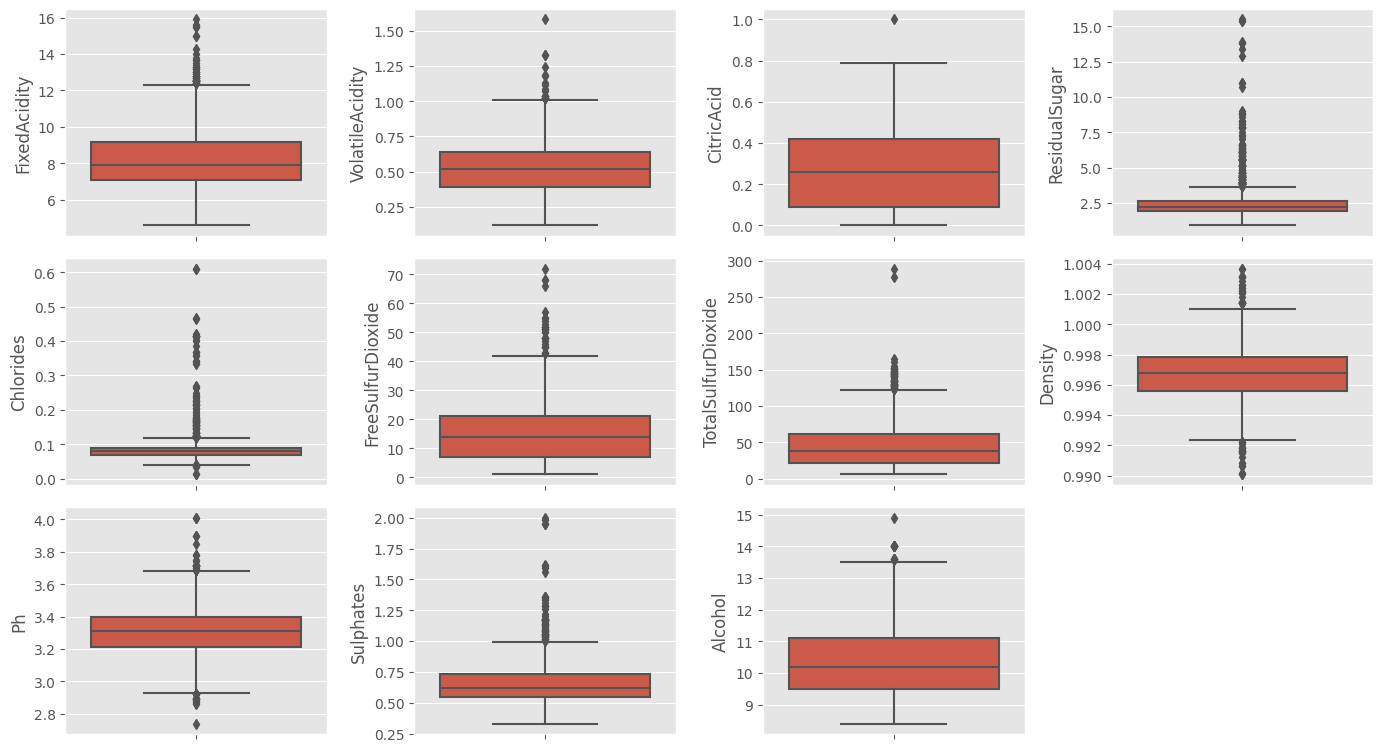

In [12]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(features):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=data)
fig.tight_layout(pad=1.0)

[]

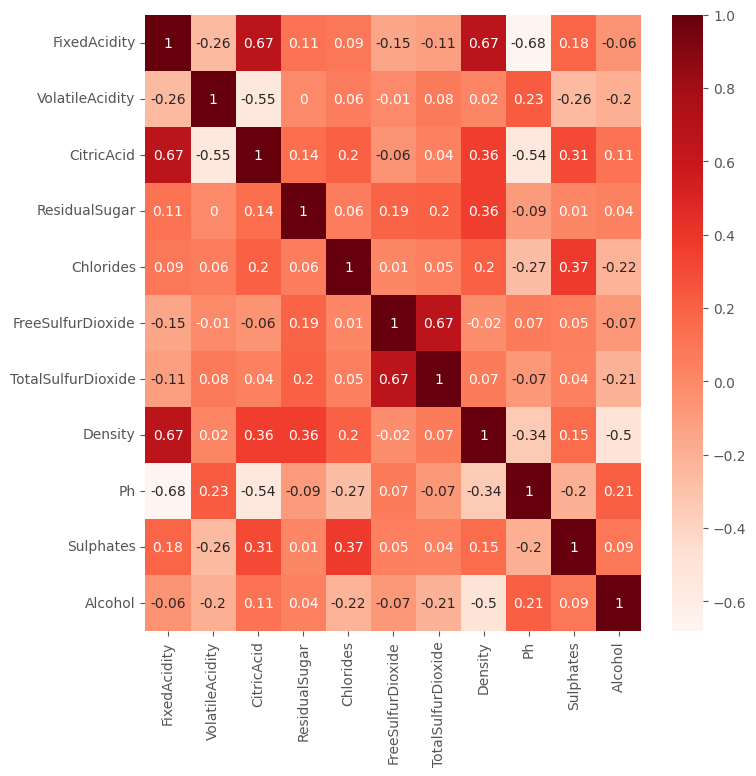

In [13]:
fig = plt.figure(figsize=(8,8))
correlation = data[features].corr().round(2)
ax = sns.heatmap(correlation, annot=True, cmap="Reds")
ax.plot()

In [14]:
pd.options.display.float_format = '{:.2f}'.format
wines_df_before = data.copy()

X1 = sm.tools.add_constant(data[features])

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["Features"] = X1.columns
vif = vif.sort_values(by="VIF", ascending=False)
vif

,VIF,Features
0,1710538.50,const
1,7.77,FixedAcidity
8,6.34,Density
9,3.33,Ph
3,3.13,CitricAcid
11,3.03,Alcohol
7,2.19,TotalSulfurDioxide
6,1.96,FreeSulfurDioxide
2,1.79,VolatileAcidity
4,1.70,ResidualSugar


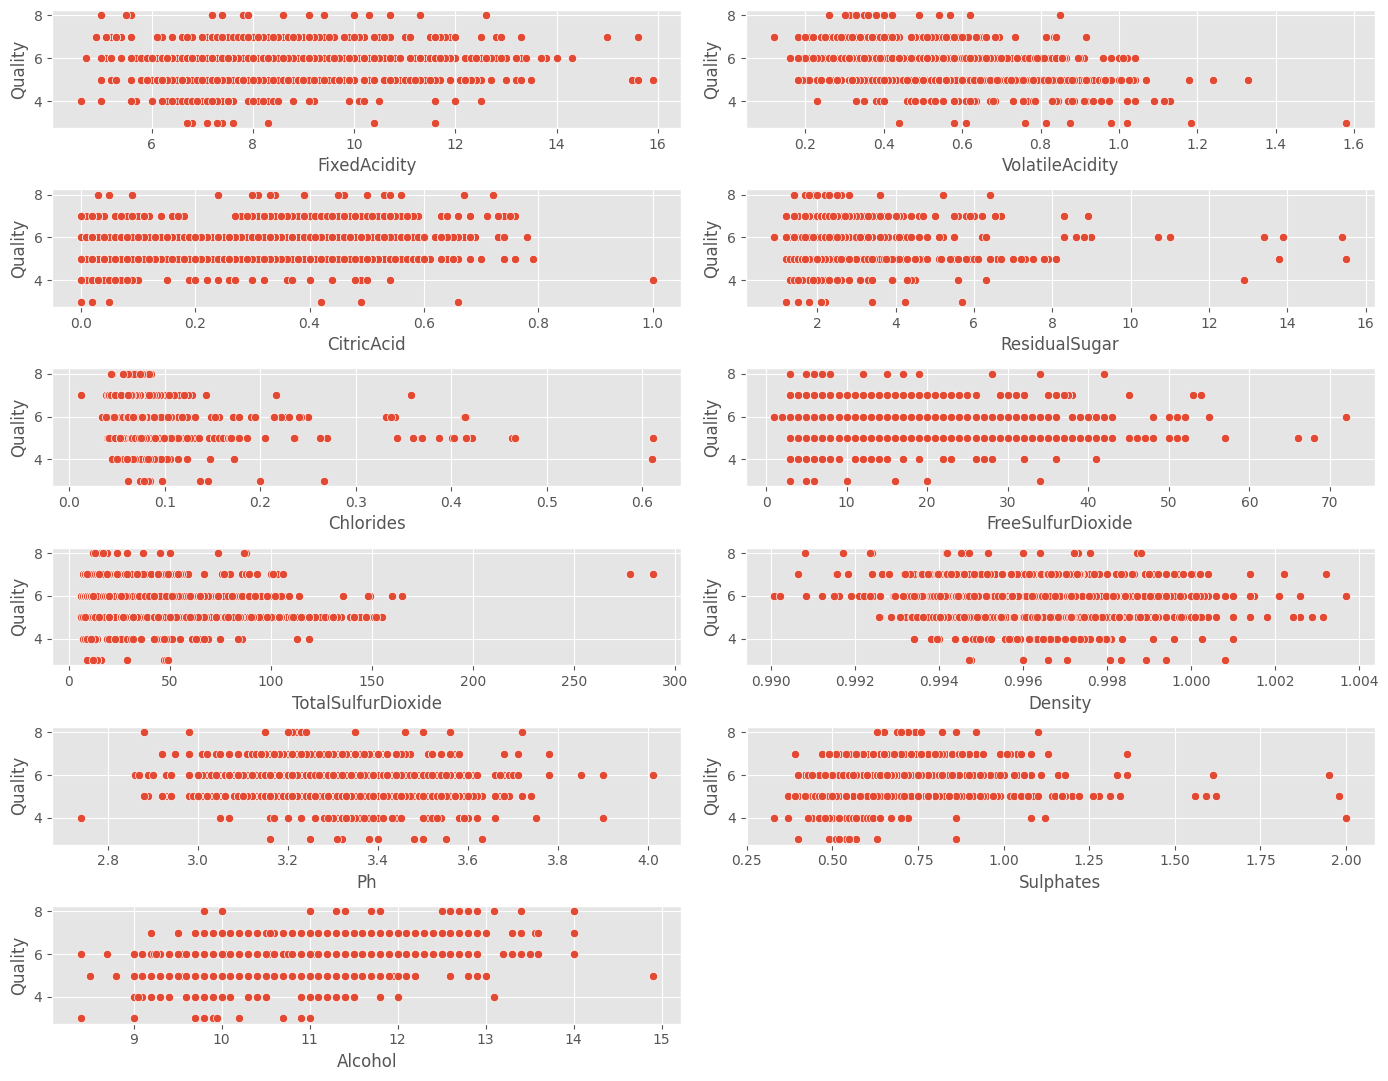

In [15]:
fig = plt.figure(figsize=(14, 14))
for index, col in enumerate(features):
    plt.subplot(8,2,index+1)
    sns.scatterplot(x=col, y=target, data=data)
fig.tight_layout(pad=1.0)

In [16]:
data = data.drop(["FixedAcidity", "Density"], axis=1)

In [17]:
features = ['VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Ph',
       'Sulphates', 'Alcohol']

In [18]:
print(f"Shape before: {data.shape}")
data = data.drop(data[data["ResidualSugar"] > 5.0].index)
data = data.drop(data[data["Chlorides"] > 0.2].index)
data = data.drop(data[data["Sulphates"] > 1.125].index)
print(f"Shape after: {data.shape}")

Shape before: (1599, 10)
Shape after: (1461, 10)


In [19]:
data["Quality"] = data["Quality"].map(lambda x: 1 if x > 6.5 else 0)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [21]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
results = reg.predict(x_train)
cm = confusion_matrix(y_train, results)
accuracy = (cm[0,0] + cm[1, 1]) / cm.sum()
print("Train-Data Accuracy: " + str(accuracy.round(3)))

Train-Data Accuracy: 0.884


In [23]:
results = reg.predict(x_test)
cm = confusion_matrix(y_test, results)
accuracy = (cm[0,0] + cm[1, 1]) / cm.sum()
print("Test-Data Accuracy: " + str(accuracy.round(3)))

Test-Data Accuracy: 0.884


In [25]:
raw_data = pd.read_csv("/content/winequality-red.csv")

raw_data = raw_data.rename(columns=lambda column: column.title().replace(" ", ""))

raw_features = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'Ph',
       'Sulphates', 'Alcohol']
target = "Quality"

raw_data["Quality"] = raw_data["Quality"].map(lambda x: 1 if x > 6.5 else 0)

raw_data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,Ph,Sulphates,Alcohol,Quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(raw_data[features], raw_data[target], test_size=0.2, random_state=42)

raw_reg = LogisticRegression()
raw_reg.fit(x_train, y_train)

results = reg.predict(x_train)
cm = confusion_matrix(y_train, results)
accuracy = (cm[0,0] + cm[1, 1]) / cm.sum()

print("Raw-Training-Data Accuracy: " + str(accuracy.round(3)))

Raw-Training-Data Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
results = raw_reg.predict(x_test)
cm = confusion_matrix(y_test, results)
accuracy = (cm[0,0] + cm[1, 1]) / cm.sum()
print("Raw-Test-Data Accuracy: " + str(accuracy.round(3)))

Raw-Test-Data Accuracy: 0.859
